In [1]:
import mysql.connector
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import json
from scipy import stats

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Mala2ki7!",
    database="userDB"
)
mycursor = mydb.cursor()

user_id = 196
user_df = pd.read_sql('SELECT nomon_sessions, rowcol_sessions FROM study_info WHERE id ='+str(user_id), con=mydb)

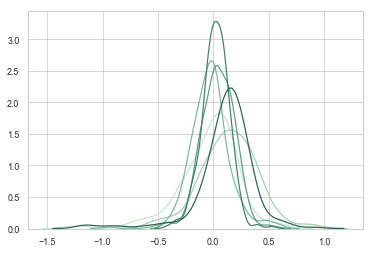

In [2]:
software_names = {"nomon": "Nomon", "rowcol": "RCS"}

software = "nomon"

sns.set_context("paper")
sns.set_style("whitegrid")

software_sessions = user_df[software+"_sessions"].values[0]
with sns.color_palette("ch:2.5,-.2,dark=.3"):
    
    for session_num in range(1, software_sessions+1):
        data_table = software + "_session_"+str(session_num)+"_user_"+str(user_id)
        
        mycursor.execute("SELECT DISTINCT phrase_num FROM "+data_table)
        phrase_nums = np.array(mycursor.fetchall()).T[0]
        
        session_click_times = []
        for phrase_num in phrase_nums:
            mycursor.execute("SELECT rel_click_times FROM "+data_table+" WHERE phrase_num = "+str(phrase_num)+
                                 " ORDER BY timestamp ASC")
            click_times = [json.loads(click_arr) for click_arr in np.array(mycursor.fetchall()).T[0]]
            while len(click_times[0]) == 0:
                click_times = click_times[1:]
            flattened_click_times = [time for selection in click_times for time in selection]
            session_click_times += flattened_click_times
        sns.kdeplot(session_click_times)
        # sns.rugplot(session_click_times)